In [5]:
import pandas as pd

In [7]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
column_names = ['id', 'diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter',
                'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity',
                'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
                'se_radius', 'se_texture', 'se_perimeter', 'se_area', 'se_smoothness',
                'se_compactness', 'se_concavity', 'se_concave_points', 'se_symmetry',
                'se_fractal_dimension', 'worst_radius', 'worst_texture', 'worst_perimeter',
                'worst_area', 'worst_smoothness', 'worst_compactness', 'worst_concavity',
                'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']
df = pd.read_csv(url, header=None, names=column_names)
df

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:1007)>

In [4]:
df = df.drop(['id'], axis=1)

NameError: name 'df' is not defined

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.diagnosis = le.fit_transform(df.diagnosis)
df

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
from sklearn.model_selection import train_test_split

y = df[['diagnosis']]
X = df.drop(y, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from numpy import interp

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2', random_state=42,
                                           solver='lbfgs', C=100.0, n_jobs=-1),
                        )

pipe_lr.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression',
                 LogisticRegression(C=100.0, n_jobs=-1, random_state=42))])

In [18]:
y_scores = pipe_lr.predict_proba(X_test)[:, 1]
y_scores

array([5.93857220e-02, 9.99963528e-01, 9.78768818e-01, 5.76556750e-03,
       1.29682247e-03, 9.99999996e-01, 9.99999993e-01, 9.92382772e-01,
       3.06875131e-01, 9.25572726e-03, 1.27635632e-02, 9.87788937e-01,
       2.87316168e-02, 9.38875930e-01, 2.65047498e-03, 9.99893040e-01,
       2.42580132e-02, 6.56763517e-05, 1.08939206e-06, 9.99997909e-01,
       2.16165129e-01, 6.76972212e-03, 9.99999939e-01, 6.00641600e-05,
       1.52058270e-03, 1.52608730e-02, 1.51173556e-02, 1.31277642e-03,
       6.09997897e-03, 9.99949589e-01, 2.19506912e-03, 7.40474035e-04,
       8.78352299e-04, 1.40444585e-02, 1.89319365e-04, 1.58567336e-03,
       7.11770424e-01, 4.42728091e-03, 9.99362000e-01, 1.30364560e-01,
       4.98415113e-04, 9.73595575e-01, 7.96733286e-03, 1.97108975e-03,
       1.92858381e-02, 3.04560646e-03, 1.99730787e-04, 1.23365152e-04,
       6.92845215e-03, 2.93073512e-02, 9.97083344e-01, 9.99997830e-01,
       1.10056103e-01, 1.84811585e-01, 2.17558710e-03, 1.55946192e-02,
      

In [19]:
#fpr: false positive rate
#tpr: true positive rate

fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

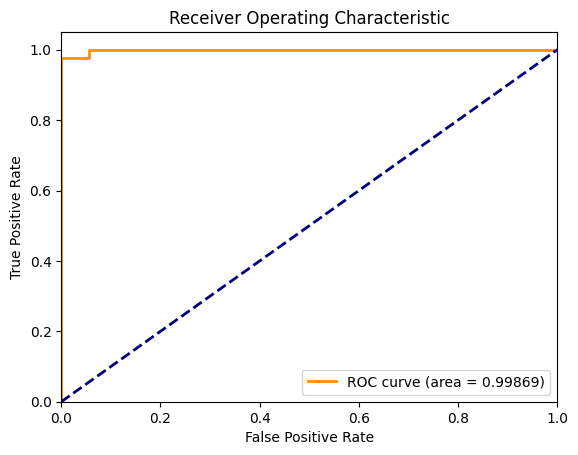

In [23]:
import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Is expected that the ROC curve be thr most closer to area 1, which indicates high True positive Rate.

In [25]:
from sklearn.model_selection import cross_val_score

# The cross validation is applied on the training sample.
# Here, the cv is calculated on the metric 'roc_auc' (area under curve AUC)
cv_score = cross_val_score(estimator=pipe_lr,
                           X=X_train, y=y_train.values.ravel(),
                           cv=10,
                           scoring='roc_auc',
                           n_jobs=-1)

cv_score_mean = round( cv_score.mean()*100, 2 )
cv_score_std  = round( cv_score.std()*100, 2 )

print(f'({cv_score_mean} +- {cv_score_std})%')

(98.65 +- 1.07)%


In [1]:
tpr

NameError: name 'tpr' is not defined